In [1]:
#import necessary libraries
import sys
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

In [2]:
#implement the class Graph 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):

        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]    

In [3]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
               
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path



def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        
        path.append(node)
        node = previous_nodes[node]
 
    # Add the start node manually
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print("The path is: {}".format(path[::-1]))
    

In [4]:
#create D SDUP algorithm function
def D_SDUP(graph, S, c):
    L= {v: 0 for v in S}    
        # make map of arraies for each subtree nodes
    T = {v: [] for v in S}
        #add the node to the all subtree
    for v in S:
        # add the node to the subtree [ node, in tree,mother node, cost]
        T[v].append([v,1,0,0])
        L[v] = 1
    # make set of DC nodes not in any subtree
    nodes = graph.get_nodes()
    D = set(nodes) - set(S)
    # while D is not empty
    while D:
        # Randomly pick a node from D
        target_node = random.choice(list(D))
        # Find the shortest path from p1 to any node in subtrees with size less than c(v)
        path_min = []
        path = []
   
        for v in S :
            if (L[v] < c[v]):
                for u in T[v]:
                    
                    start_node = u[0]
                    
                    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node=start_node)
                    node = target_node
                    if node in previous_nodes:
                        path = []
                        while node != start_node:
                            path.append(node)
                            node = previous_nodes[node]

                        # Add the start node manually
                        path.append(start_node)
                        if path_min == []:
                            path_min = path[::-1]
                            path_min_length= shortest_path[target_node]
                            tree=v
                        elif path_min_length > shortest_path[target_node]:
                            path_min = path[::-1]
                            path_min_length= shortest_path[target_node]
                            tree=v  
        if path_min == []:
            print(T)
            print(D)
            print(target_node)
            print(graph.get_outgoing_edges(target_node))
            

        # Check the condition for adding nodes to the subtree

        if len(set(path_min) & D) <= c[tree] - L[tree] :
            # Add P into Tj and remove nodes of P from D
            previous_node = path_min[0]
            for node in path_min[1:]:
                #if node is in D
                if node in D:
                    node_in_tree = 1
                    L[tree] += 1
                else:
                    node_in_tree = 0
                T[tree].append([node,node_in_tree,previous_node,graph.value(node, previous_node) ])
                previous_node = node

            D -= set(path_min)
        else:

            # Find pq in D such that the condition is satisfied
            previous_node = path_min[0]
            i=1
            while c[tree] > L[tree] :

                node=path_min[i]
                if node in D:
                    node_in_tree = 1
                    L[tree] += 1
                    D -= set([node])
                else:
                    node_in_tree = 0   
                T[tree].append([node,node_in_tree,previous_node,graph.value(node, previous_node) ])
                previous_node = node
                i=i+1

    return T  
          
def print_subtrees(T,S):
    Total_cost = 0
    for v in S:
        List = []
        Sum=0
        lenght=0
        for u in T[v]:
            if (u[1] == 1):
                List.append(u[0])
            Sum= Sum + u[3]
            lenght= lenght + u[1]
        Total_cost = Total_cost + Sum
        print ("Subtree from node",v,"with capacity",lenght ,":", List , "--> cost = ", Sum )  
    print("Total cost:", Total_cost) 

def total_cost(T,S):
    Total_cost = 0
    for v in S:
        for u in T[v]:
            Total_cost = Total_cost + u[3]
    return Total_cost    


In [5]:
#create P SDUP algorithm function
def P_SDUP(graph, S, c):
    L= {v: 0 for v in S}    
        # make map of arraies for each subtree nodes
    T = {v: [] for v in S}
        #add the node to the all subtree
    for v in S:
        # add the node to the subtree [ node, in tree,mother node, cost]
        T[v].append([v,1,0,0])
        L[v] = 1
    # make set of DC nodes not in any subtree
    nodes = graph.get_nodes()
    D = set(nodes) - set(S)
    # while D is not empty and there is no neighbor in D to any subtree with size less than c(v)
    
    while D and any(L[v] < c[v] for v in S) and any(any(L[v] < c[v] and len(set(graph.get_outgoing_edges(u[0])) & D) > 0 for u in T[v]) for v in S):
        # Find an edge (u, w) with minimum weight in graph such that u is in Tj, w is in D, and c[vj] - |Tj| > 0
        min_edge = None
        min_weight = float('inf')
        target_tree = None

        for v in S:
            if L[v] < c[v]:
                for u in T[v]:
                    
                    for w in graph.get_outgoing_edges(u[0]):
                        if w in D and graph.value(u[0], w) < min_weight:
                            min_edge = (u[0], w)
                            min_weight = graph.value(u[0], w)
                            target_tree = v

        # If we found a suitable edge, add it to the target tree and remove the node from D
        if min_edge is not None:
            u, w = min_edge
            T[target_tree].append([w, 1, u, graph.value(u, w)])
            L[target_tree] += 1
            D.remove(w)

        
    while D:
        # Randomly pick a node from D
        target_node = random.choice(list(D))
        # Find the shortest path from p1 to any node in subtrees with size less than c(v)
        path_min = []
        path = []
        
        for v in S :
            if (L[v] < c[v]):
                for u in T[v]:
                    if u[1] == 1:
                        start_node = u[0]
                        
                        previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node=start_node)
                        node = target_node
                        if node in previous_nodes:
                            path = []
                            while node != start_node:
                                path.append(node)
                                node = previous_nodes[node]


                            # Add the start node manually
                            path.append(start_node)
                            if path_min == []:
                                path_min = path[::-1]
                                path_min_length= shortest_path[target_node]
                                tree=v
                            elif path_min_length > shortest_path[target_node]:
                                path_min = path[::-1]
                                path_min_length= shortest_path[target_node]
                                tree=v 
                        
    
            
        # Check the condition for adding nodes to the subtree
        if len(set(path_min) & D) <= c[tree] - L[tree] :
            # Add P into Tj and remove nodes of P from D
            previous_node = path_min[0]
            for node in path_min[1:]:
                #if node is in D
                if node in D:
                    node_in_tree = 1
                    L[tree] += 1
                else:
                    node_in_tree = 0
                T[tree].append([node,node_in_tree,previous_node,graph.value(node, previous_node) ])
                previous_node = node

            D -= set(path_min)
        else:
            # Find pq in D such that the condition is satisfied
            previous_node = path_min[0]
            i=1
            while c[tree] > L[tree] :

                node=path_min[i]
                if node in D:
                    node_in_tree = 1
                    L[tree] += 1
                    D -= set([node])
                else:
                    node_in_tree = 0   
                T[tree].append([node,node_in_tree,previous_node,graph.value(node, previous_node) ])
                previous_node = node
                i=i+1

    return T  
          



In [70]:
# Quick test of the intlaization of the graph

# Number of SDs
n = 50

# Number of VBSs
k = 5

# Communication probability
p = 0.8
# Create a array with n nodes from 2 to n
nodes = range(1,n+1)

 
init_graph = {}
for node in nodes:
    init_graph[node] = {}

# Randomly add edges with random weights
for i in nodes:
    for j in range(i+1, n+1):
        if random.random() < p:
            init_graph[i][j] = random.randint(1, 101)
        else:
            init_graph[i][j] = 1000 
           
S=[]
# Randomly select k VBSs
while len(S)<k:
    s = random.randint(1, n+1)
    if s not in S:
        S.append(s)
    
graph = Graph(nodes, init_graph)

# Calculate the capacity of each server
c = {v: n//k for v in S}

#sum of the capacity of the VBSs



while sum(c.values()) <n:
    c[random.choice(list(S))]+=1
    
    
print(c)


{47: 10, 49: 10, 19: 10, 27: 10, 12: 10}


In [68]:
# Test the algorithms
mean_cost=0
max_cost=0
min_cost=10e7

for i in tqdm(range(100)):
    
    T= P_SDUP(graph, S, c)
    mean_cost= mean_cost + total_cost(T)
    if total_cost(T)>max_cost:
        max_cost=total_cost(T)
    if total_cost(T)<min_cost:
        min_cost=total_cost(T)    
mean_cost= mean_cost/100
print("mean = ",mean_cost)
print("min = ",min_cost)
print("max = ",max_cost)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 25.31it/s]

mean =  321.0
min =  321
max =  321


K:  10 , c:  20


100%|██████████| 20/20 [09:33<00:00, 28.69s/it]


K:  10 , c:  30


100%|██████████| 20/20 [16:07<00:00, 48.39s/it]


K:  10 , c:  40


100%|██████████| 20/20 [22:37<00:00, 67.86s/it]


K:  10 , c:  50


100%|██████████| 20/20 [28:28<00:00, 85.41s/it] 


K:  10 , c:  60


100%|██████████| 20/20 [25:01<00:00, 75.06s/it]


K:  10 , c:  70


100%|██████████| 20/20 [27:08<00:00, 81.43s/it]


K:  10 , c:  80


100%|██████████| 20/20 [31:10<00:00, 93.50s/it] 


K:  10 , c:  90


100%|██████████| 20/20 [31:00<00:00, 93.04s/it]


K:  10 , c:  100


100%|██████████| 20/20 [30:40<00:00, 92.00s/it]


K:  10 , c:  110


100%|██████████| 20/20 [32:31<00:00, 97.57s/it] 


K:  10 , c:  120


100%|██████████| 20/20 [32:12<00:00, 96.64s/it]


K:  15 , c:  20


100%|██████████| 20/20 [16:13<00:00, 48.66s/it]


K:  15 , c:  30


100%|██████████| 20/20 [23:12<00:00, 69.61s/it]


K:  15 , c:  40


100%|██████████| 20/20 [29:17<00:00, 87.85s/it]


K:  15 , c:  50


100%|██████████| 20/20 [33:15<00:00, 99.80s/it] 


K:  15 , c:  60


100%|██████████| 20/20 [33:02<00:00, 99.12s/it] 


K:  15 , c:  70


100%|██████████| 20/20 [33:38<00:00, 100.90s/it]


K:  15 , c:  80


100%|██████████| 20/20 [35:15<00:00, 105.77s/it]


K:  15 , c:  90


100%|██████████| 20/20 [35:16<00:00, 105.82s/it]


K:  15 , c:  100


100%|██████████| 20/20 [35:02<00:00, 105.11s/it]


K:  15 , c:  110


100%|██████████| 20/20 [35:04<00:00, 105.23s/it]


K:  15 , c:  120


100%|██████████| 20/20 [36:05<00:00, 108.28s/it]


K:  20 , c:  10


100%|██████████| 20/20 [10:48<00:00, 32.44s/it]


K:  20 , c:  20


100%|██████████| 20/20 [25:37<00:00, 76.85s/it]


K:  20 , c:  30


100%|██████████| 20/20 [31:33<00:00, 94.66s/it]


K:  20 , c:  40


100%|██████████| 20/20 [33:32<00:00, 100.62s/it]


K:  20 , c:  50


100%|██████████| 20/20 [33:07<00:00, 99.39s/it] 


K:  20 , c:  60


100%|██████████| 20/20 [34:54<00:00, 104.71s/it]


K:  20 , c:  70


100%|██████████| 20/20 [33:04<00:00, 99.25s/it] 


K:  20 , c:  80


100%|██████████| 20/20 [28:56<00:00, 86.85s/it]


K:  20 , c:  90


100%|██████████| 20/20 [28:23<00:00, 85.16s/it]


K:  20 , c:  100


100%|██████████| 20/20 [28:50<00:00, 86.51s/it]


K:  25 , c:  10


100%|██████████| 20/20 [12:37<00:00, 37.88s/it]


K:  25 , c:  20


100%|██████████| 20/20 [22:34<00:00, 67.72s/it]


K:  25 , c:  30


100%|██████████| 20/20 [25:37<00:00, 76.86s/it]


K:  25 , c:  40


100%|██████████| 20/20 [31:19<00:00, 93.96s/it] 


K:  25 , c:  50


100%|██████████| 20/20 [35:11<00:00, 105.59s/it]


K:  25 , c:  60


100%|██████████| 20/20 [35:03<00:00, 105.19s/it]


K:  25 , c:  70


100%|██████████| 20/20 [35:11<00:00, 105.55s/it]


K:  25 , c:  80


100%|██████████| 20/20 [34:54<00:00, 104.74s/it]


K:  25 , c:  90


100%|██████████| 20/20 [33:16<00:00, 99.84s/it] 


K:  25 , c:  100


100%|██████████| 20/20 [31:40<00:00, 95.00s/it] 


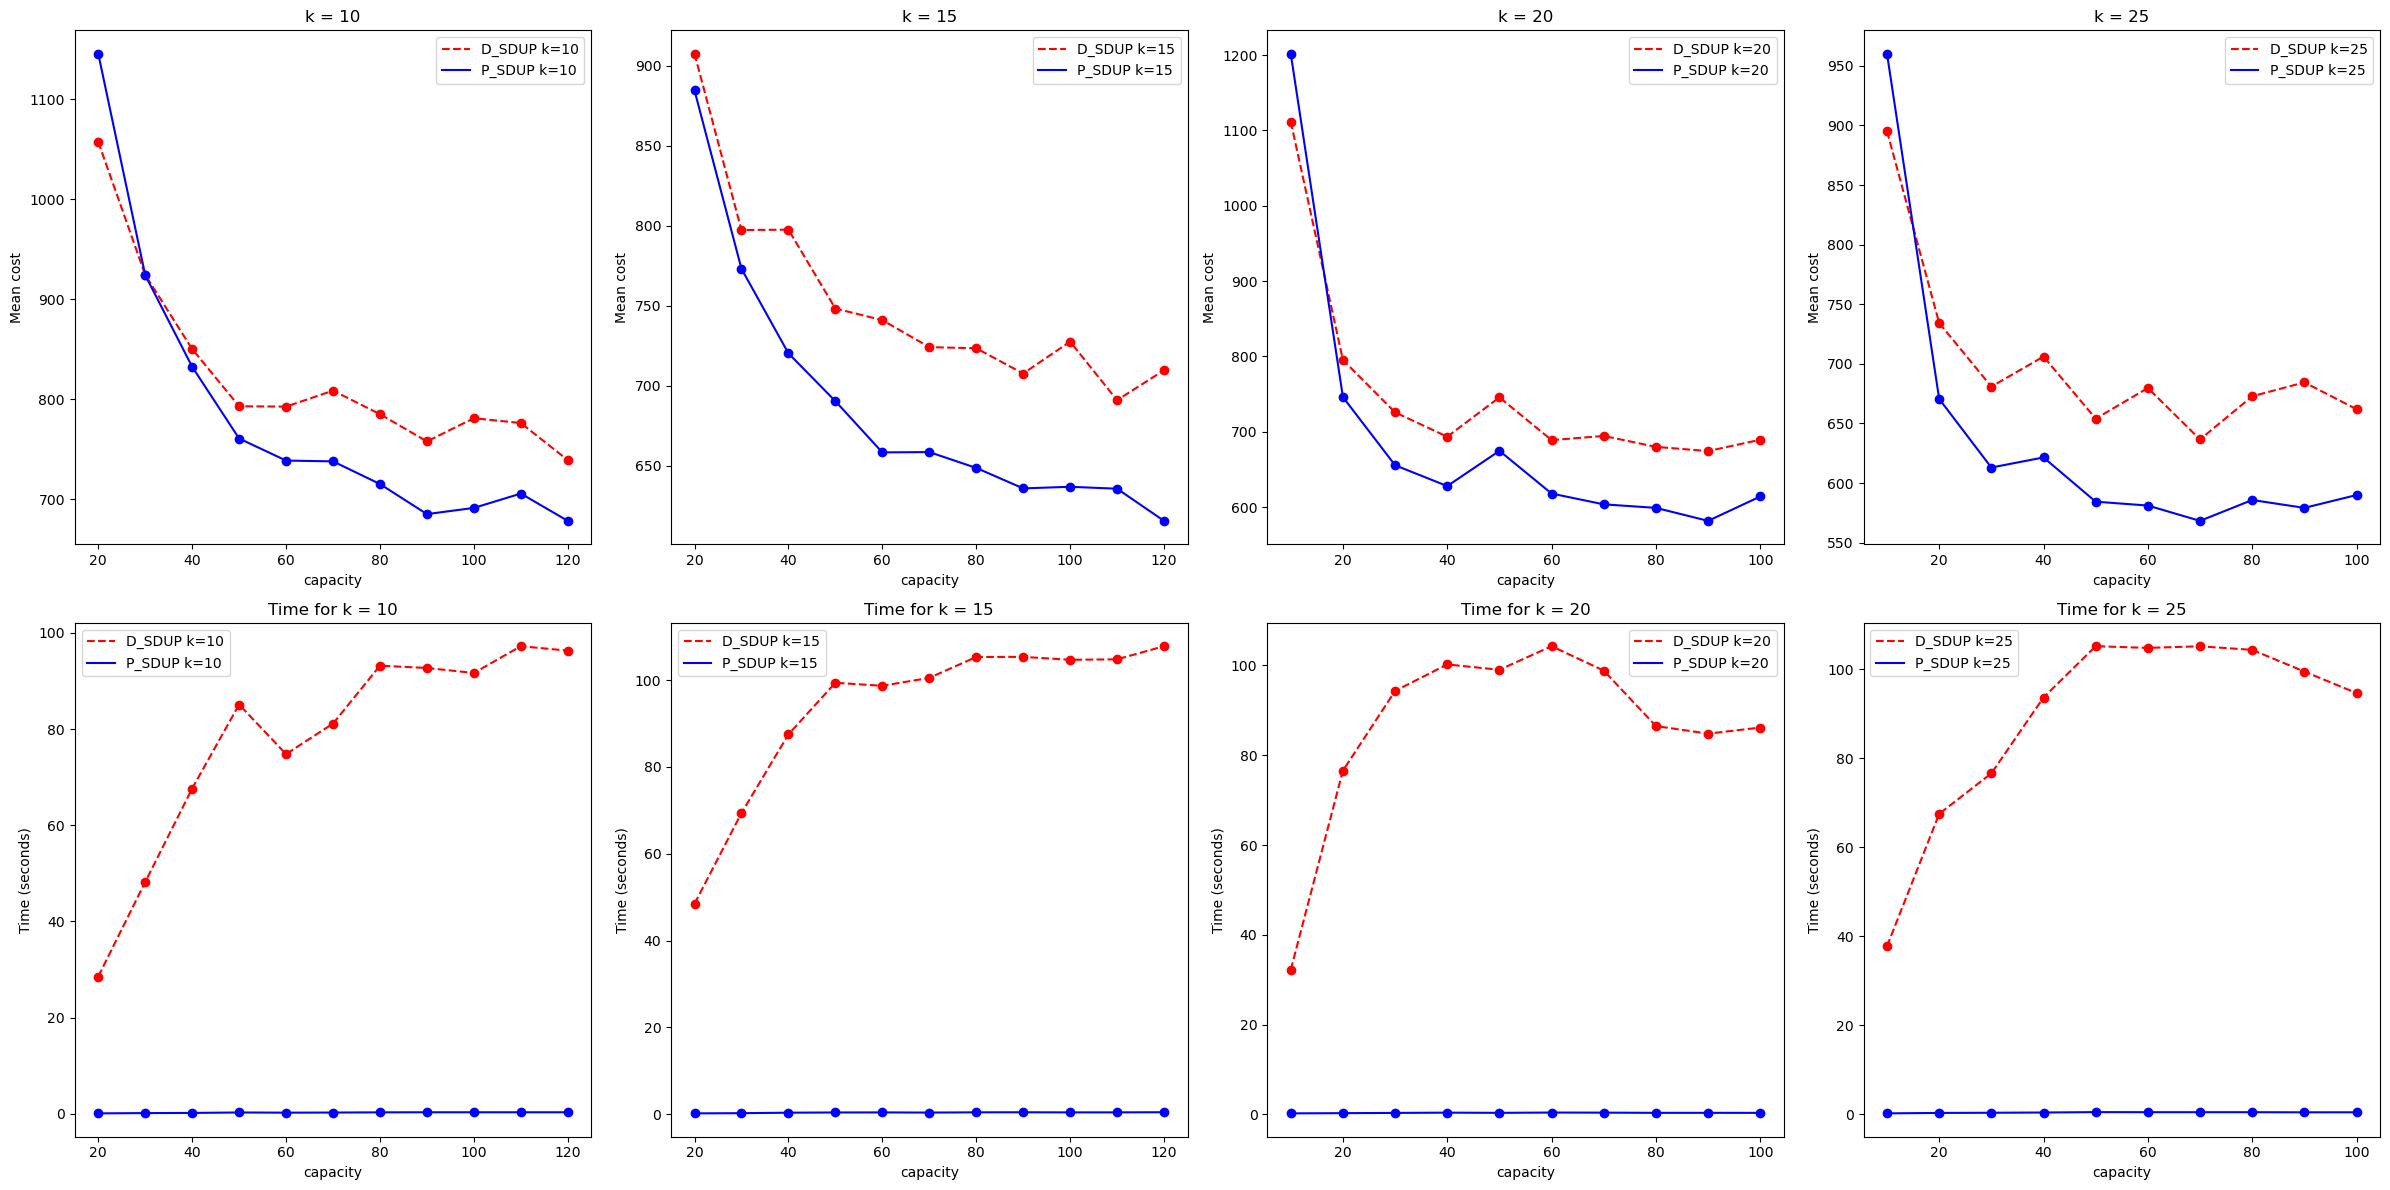

In [7]:
# senario 2  test different capacities for D_SDUP and P_SDUP algorithms 

n = 200
K_values = [10, 15, 20, 25]

p = 0.2
fig, axs = plt.subplots(2, len(K_values), figsize=(6*len(K_values), 12))
for idx, K in enumerate(K_values):
    results_D = []
    results_P = []
    times_D = []
    times_P = []
    
    if K  == 10 or K == 15:
        c_values = [20,30,40,50,60,70,80,90,100,110,120]
    if K  == 20 or K == 25:
        c_values = [10,20,30,40,50,60,70,80,90,100]

    for C in c_values:
        mean_cost_D = 0
        mean_cost_P = 0
        time_taken_D = 0
        time_taken_P =0
        
        print("K: ",K,", c: ", C)
        for _ in tqdm(range(100)):
            nodes = range(1,n+1)   
            init_graph = {}
            for node in nodes:
                init_graph[node] = {}
            for i in nodes:
                # Select two different random nodes for edges
                random_nodes = random.sample(nodes, 1)
                
                # Ensure the random nodes are not the same as the current node
                while i in random_nodes:
                    random_nodes = random.sample(nodes, 1)
                
                # Add the edges
                init_graph[i][random_nodes[0]] = random.randint(1, 100)
                


            # Randomly add edges with random weights
            for i in nodes:
                for j in range(i+1, n+1):
                    if random.random() < p:
                        init_graph[i][j] = random.randint(1, 100)     
            S=[]
            # Randomly select k VBSs
            while len(S)<K:
                s = random.randint(1, n)
                if s not in S:
                    S.append(s)
                
            graph = Graph(nodes, init_graph)

            c = {v: C for v in S}
            
            
        
            
            start_time_D = time.time()
            T_D = D_SDUP(graph, S, c)
            mean_cost_D += total_cost(T_D,S)
            end_time_D = time.time()  
            time_taken_D = end_time_D - start_time_D +time_taken_D 


            start_time_P = time.time()
            T_P = P_SDUP(graph, S, c)
            mean_cost_P += total_cost(T_P,S)
            end_time_P = time.time()
            time_taken_P = end_time_P - start_time_P +time_taken_P
        
        mean_cost_D /= 100
        time_taken_D /=100
        results_D.append(mean_cost_D)
        times_D.append(time_taken_D)
        mean_cost_P /= 100
        time_taken_P /=100
        results_P.append(mean_cost_P)
        times_P.append(time_taken_P)  

    
    axs[0, idx].plot(c_values, results_D, label=f'D_SDUP k={K}', linestyle='--', color='red')
    axs[0, idx].scatter(c_values, results_D, color='red')
    axs[0, idx].plot(c_values, results_P, label=f'P_SDUP k={K}', linestyle='-', color='blue')
    axs[0, idx].scatter(c_values, results_P, color='blue')
    axs[0, idx].set_xlabel('capacity')
    axs[0, idx].set_ylabel('Mean cost')
    axs[0, idx].legend()
    axs[0, idx].set_title(f'k = {K}')


    axs[1, idx].plot(c_values, times_D, label=f'D_SDUP k={K}', linestyle='--', color='red')
    axs[1, idx].scatter(c_values, times_D, color='red')
    axs[1, idx].plot(c_values, times_P, label=f'P_SDUP k={K}', linestyle='-', color='blue')
    axs[1, idx].scatter(c_values, times_P, color='blue') 
    axs[1, idx].set_xlabel('capacity')
    axs[1, idx].set_ylabel('Time (seconds)')
    axs[1, idx].legend()
    axs[1, idx].set_title(f'Time for k = {K}')
    
plt.tight_layout()
plt.show()